<a href="https://colab.research.google.com/github/gvbsvv/DO180-apps/blob/master/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT/foodhub_order.csv',delimiter=",")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)


num_rows, num_columns = data.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


Number of rows: 1898
Number of columns: 9


#### Observations:
Number of rows: 1898
Number of columns: 9
Number of rows: 1898 Number of columns: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)

column_data_types = data.dtypes
data_info = data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object
 3   cuisine_type           1898 non-null   object
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object
 6   rating                 1898 non-null   object
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 0 order_id 1898 non-null int64
1 customer_id 1898 non-null int64
2 restaurant_name 1898 non-null object 3 cuisine_type 1898 non-null object 4 cost_of_the_order 1898 non-null float64 5 day_of_the_week 1898 non-null object 6 rating 1898 non-null object 7 food_preparation_time 1898 non-null int64
8 delivery_time 1898 non-null int64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)


missing_values = data.isnull()


data_cleaned = data.dropna()


data_filled = data.fillna(0)


data_interpolated = data.interpolate()





print(data_cleaned)


      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  Not given   
1          Japanese  

#### Observations:

0s
# Write your code here
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)


…




print(data_cleaned)

output
      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  Not given   
1          Japanese              12.08         Weekend  Not given   
2           Mexican              12.23         Weekday          5   
3          American              29.20         Weekend          3   
4          American              11.59         Weekday          4   
...             ...                ...             ...        ...   
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time  delivery_time  
0                        25             20  
1                        25             23  
2                        23             28  
3                        25             15  
4                        25             24  
...                     ...            ...  
1893                     31             17  
1894                     31             19  
1895                     31             24  
1896                     23             31  
1897                     28             24  

[1898 rows x 9 columns]


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


column_name = 'food_preparation_time'


min_value = data[column_name].min()
avg_value = data[column_name].mean()
max_value = data[column_name].max()

print(f"Minimum {column_name}: {min_value}")
print(f"Average {column_name}: {avg_value}")
print(f"Maximum {column_name}: {max_value}")


Minimum food_preparation_time: 20
Average food_preparation_time: 27.371970495258168
Maximum food_preparation_time: 35


#### Observations:
Minimum food_preparation_time: 20
Average food_preparation_time: 27.371970495258168
Maximum food_preparation_time: 35


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
import pandas as pd


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)
rating_column = 'rating'
orders_with_not_given_rating = data[data[rating_column] == 'Not given']
print("Orders with a rating of 'Not given':")
print(orders_with_not_given_rating)


Orders with a rating of 'Not given':
      order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
14     1478198        62667      Lucky's Famous Burgers     American   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     American   
1892   1477473        97838                 Han Dynasty      Chinese   
1895   1477819        35309           Blue Ribbon Sushi     Japanese   
1897   1478056       120353           Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0                 30.

#### Observations:
Orders with a rating of 'Not given':
      order_id  customer_id             restaurant_name cuisine_type  \
0      1477147       337525                     Hangawi       Korean   
1      1477685       358141   Blue Ribbon Sushi Izakaya     Japanese   
6      1477894       157711           The Meatball Shop      Italian   
10     1477895       143926  Big Wong Restaurant _¤¾Ñ¼      Chinese   
14     1478198        62667      Lucky's Famous Burgers     American   
...        ...          ...                         ...          ...   
1887   1476873       237616                 Shake Shack     American   
1891   1476981       138586                 Shake Shack     American   
1892   1477473        97838                 Han Dynasty      Chinese   
1895   1477819        35309           Blue Ribbon Sushi     Japanese   
1897   1478056       120353           Blue Ribbon Sushi     Japanese   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0                 30.75         Weekend  Not given                     25   
1                 12.08         Weekend  Not given                     25   
6                  6.07         Weekend  Not given                     28   
10                 5.92         Weekday  Not given                     34   
14                12.13         Weekday  Not given                     23   
...                 ...             ...        ...                    ...   
1887               5.82         Weekend  Not given                     26   
1891               5.82         Weekend  Not given                     22   
1892              29.15         Weekend  Not given                     29   
1895              25.22         Weekday  Not given                     31   
1897              19.45         Weekend  Not given                     28   

      delivery_time  
0                20  
1                23  
6                21  
10               28  
14               30  
...             ...  
1887             30  
1891             28  
1892             21  
1895             24  
1897             24  

[736 rows x 9 columns]

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

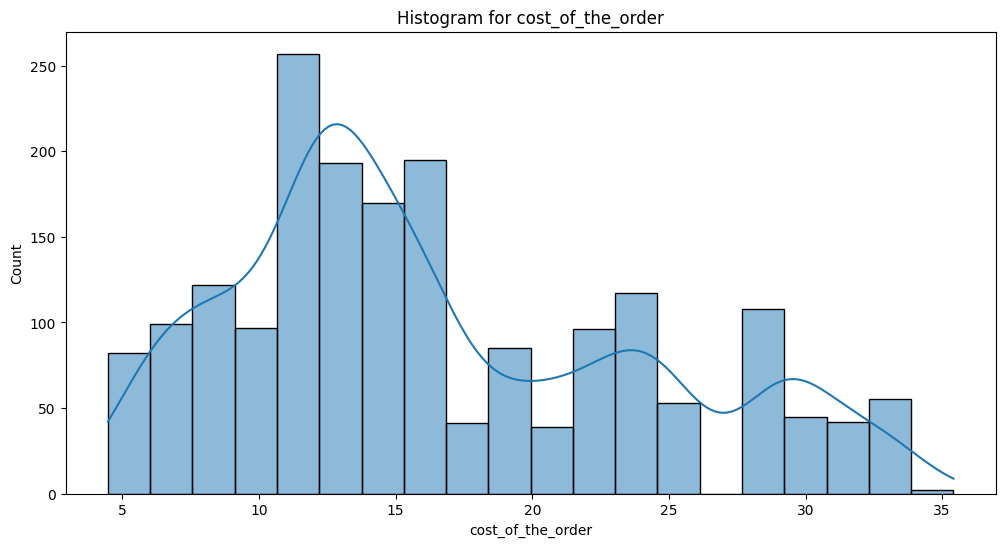

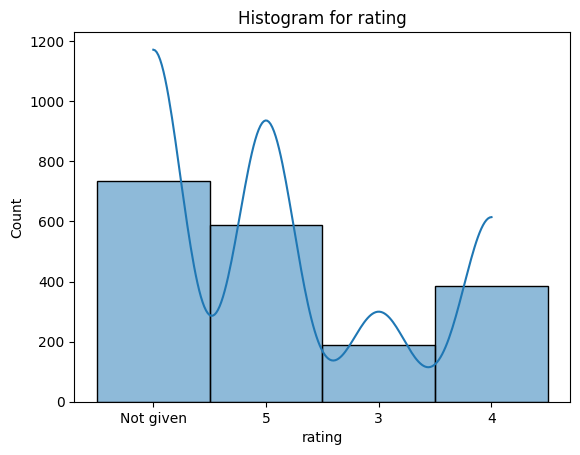

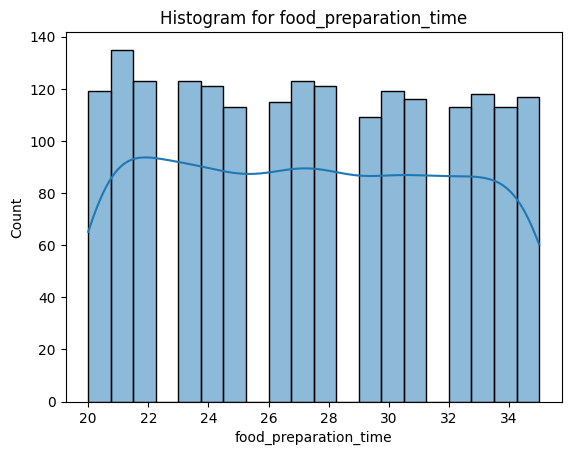

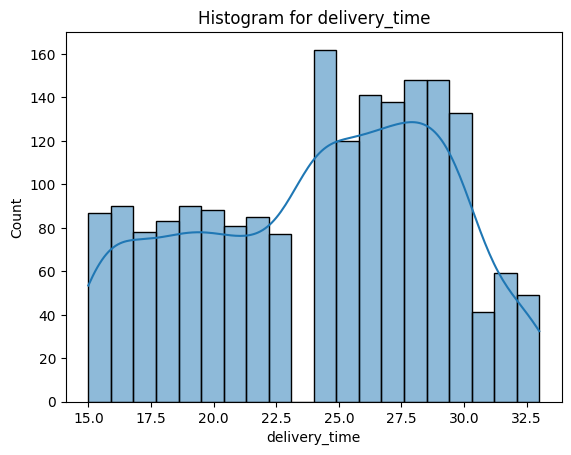

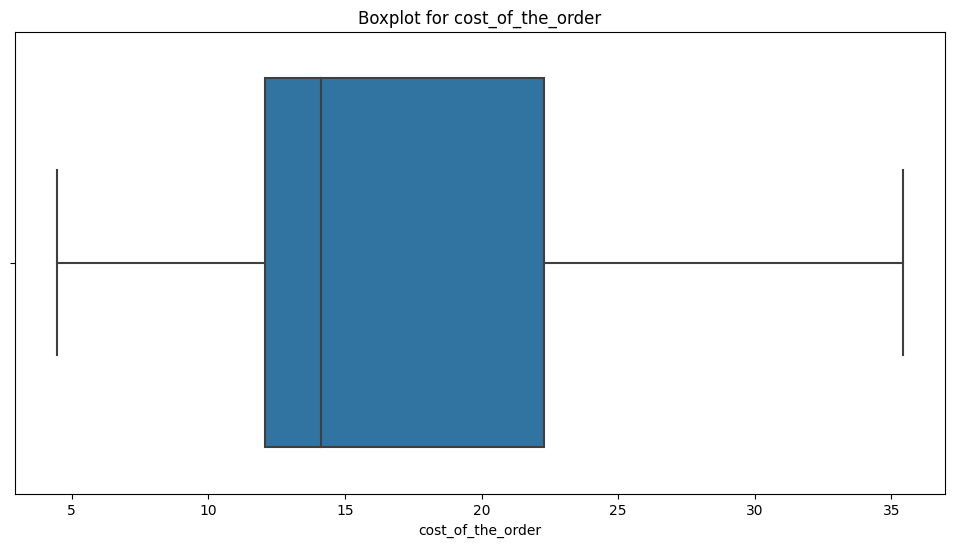

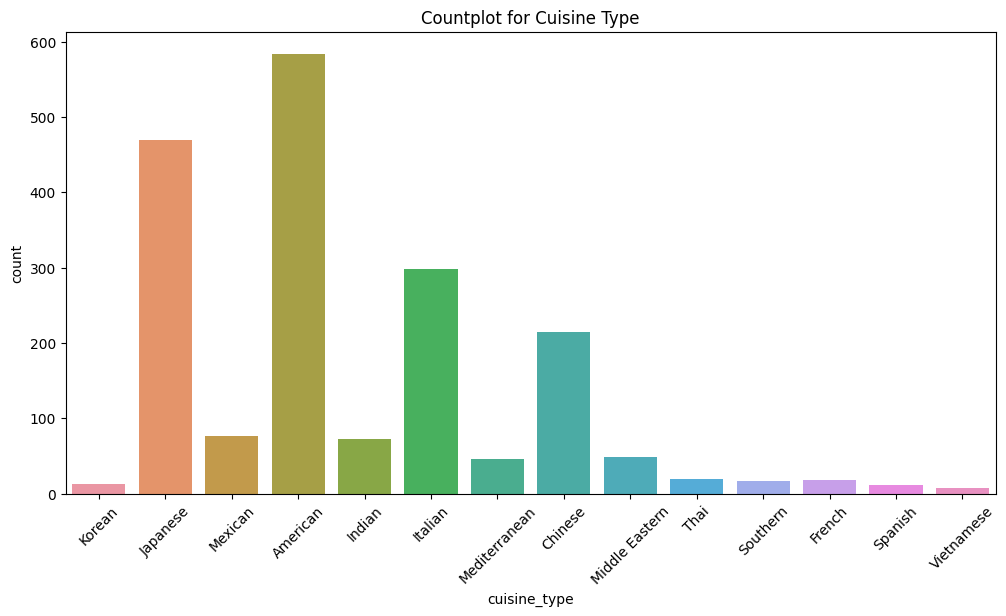

In [ ]:
# Write the code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'


data = pd.read_csv(file_path)

# Create histograms for numerical columns
numeric_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(12, 6))

for column in numeric_columns:
    sns.histplot(data=data, x=column, bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

# Create a boxplot for the 'cost_of_the_order' column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cost_of_the_order')
plt.title('Boxplot for cost_of_the_order')
plt.show()

# Create a countplot for the 'cuisine_type' column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='cuisine_type')
plt.title('Countplot for Cuisine Type')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)
restaurant_orders = data.groupby('restaurant_name')['order_id'].count()
top_restaurants = restaurant_orders.sort_values(ascending=False)
top_5_restaurants = top_restaurants.head(5)
print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)



Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)
weekend_data = data[data['day_of_the_week'].isin(['Weekend'])]
cuisine_counts = weekend_data['cuisine_type'].value_counts()
most_popular_cuisine = cuisine_counts.idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine)




The most popular cuisine on weekends is: American


#### Observations:
The most popular cuisine on weekends is: American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)
expensive_orders = data[data['cost_of_the_order'] > 20]
percentage_expensive = (len(expensive_orders) / len(data)) * 100

print(f"The percentage of orders costing more than $20 is: {percentage_expensive:.2f}%")


The percentage of orders costing more than $20 is: 29.24%


#### Observations:
The percentage of orders costing more than $20 is: 29.24%

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)
mean_delivery_time = data['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:
The mean order delivery time is: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)
order_counts = data['customer_id'].value_counts()
customer_order_counts = pd.DataFrame({'Customer_ID': order_counts.index, 'Number_of_Orders': order_counts.values})
print("Customer IDs and Number of Orders:")
print(customer_order_counts)


Customer IDs and Number of Orders:
      Customer_ID  Number_of_Orders
0           52832                13
1           47440                10
2           83287                 9
3          250494                 8
4          259341                 7
...           ...               ...
1195       385426                 1
1196       254913                 1
1197       289597                 1
1198        74412                 1
1199       397537                 1

[1200 rows x 2 columns]


#### Observations:
0           52832                13
1           47440                10
2           83287                 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

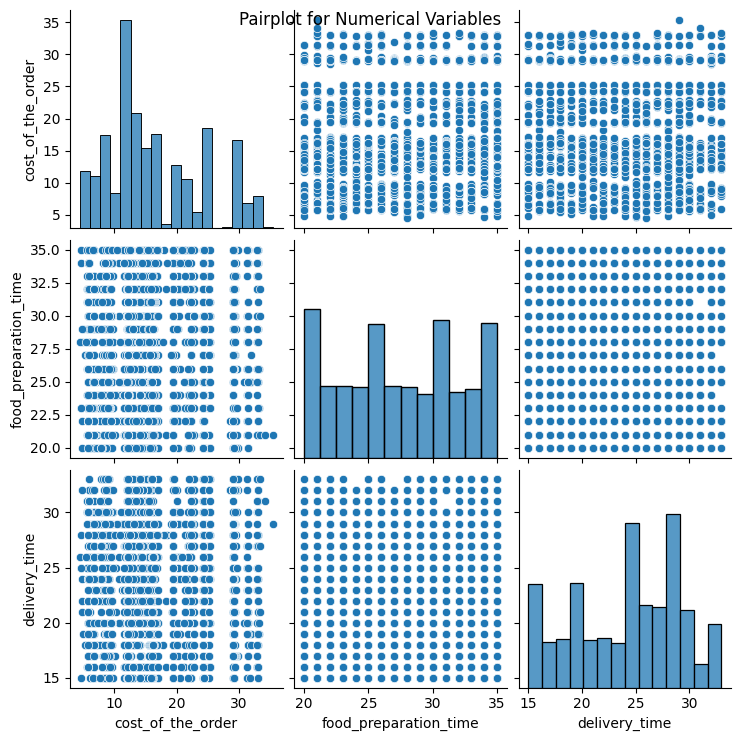

<ipython-input-27-c449ead7f1e3>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[numerical_columns].corr()


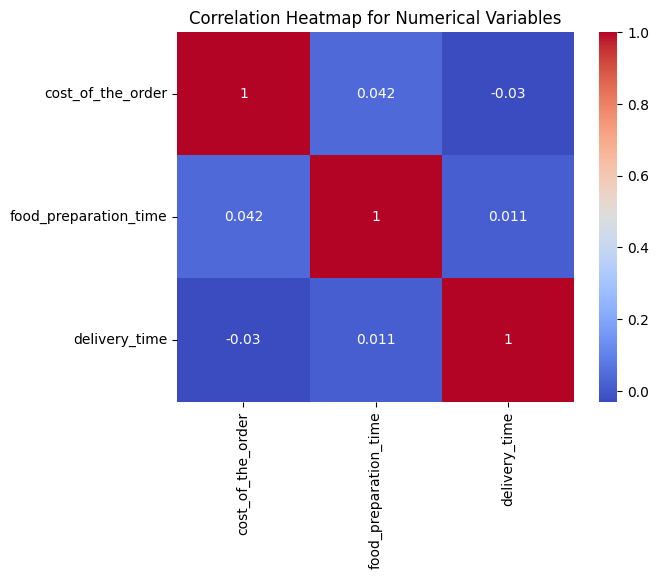

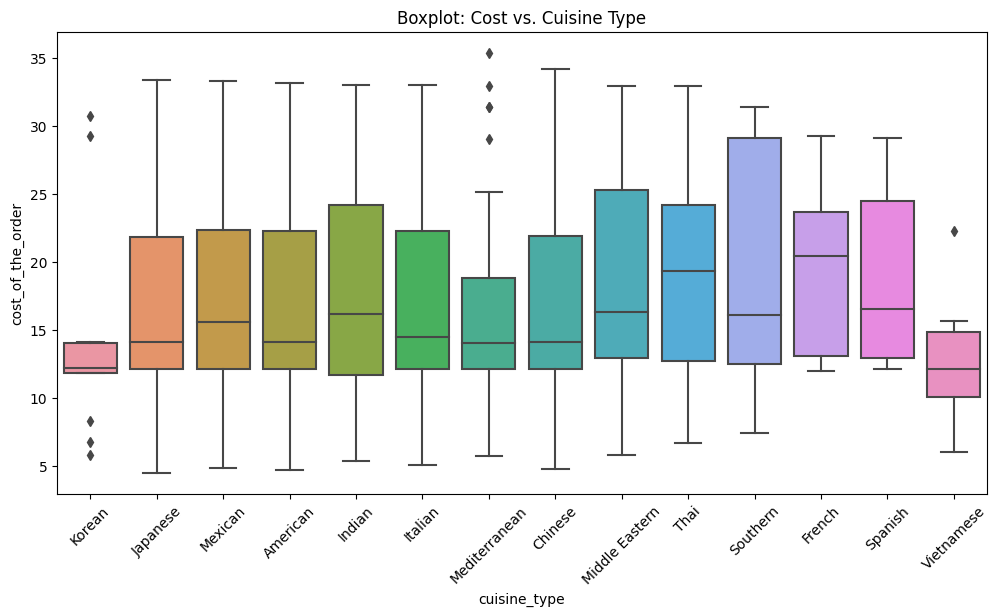

In [ ]:
# Write the code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
data = pd.read_csv(file_path)

numerical_columns = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']

# Categorical variable (column)
categorical_column = 'cuisine_type'

# Pairplot for numerical variables
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairplot for Numerical Variables")
plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# Boxplot for a numerical variable vs. a categorical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=categorical_column, y='cost_of_the_order')
plt.title("Boxplot: Cost vs. Cuisine Type")
plt.xticks(rotation=45)
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
df = pd.read_csv(file_path)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_filtered = df[df["rating"].notnull()]
df_filtered = df_filtered[(df_filtered["rating"] > 4) & (df_filtered["rating"].value_counts() > 50)]
restaurant_names = df_filtered["restaurant_name"].unique()
print(restaurant_names)






[]


#### Observations:
no restaurant is eligeble for promotion with requirement of rating count of more than 50 and the average rating should be greater than 4


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here

import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
df = pd.read_csv(file_path)
revenue_from_orders_greater_than_20 = df["cost_of_the_order"][df["cost_of_the_order"] > 20] * 0.25
revenue_from_orders_greater_than_5_and_less_than_or_equal_to_20 = df["cost_of_the_order"][(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20)] * 0.15
total_revenue = revenue_from_orders_greater_than_20 + revenue_from_orders_greater_than_5_and_less_than_or_equal_to_20 + df["cost_of_the_order"][df["cost_of_the_order"] <= 5]
print("Total revenue generated by the company: $", total_revenue)

Total revenue generated by the company: $ 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1893   NaN
1894   NaN
1895   NaN
1896   NaN
1897   NaN
Name: cost_of_the_order, Length: 1898, dtype: float64


#### Observations:
Total revenue is 0

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
df = pd.read_csv(file_path)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
df_filtered = df[df['total_delivery_time'] > 60]
percentage_of_orders_taking_more_than_60_minutes_to_get_delivered = (len(df_filtered) / len(df)) * 100
print("Percentage of orders taking more than 60 minutes when food prep is included:", percentage_of_orders_taking_more_than_60_minutes_to_get_delivered, "%")



Percentage of orders taking more than 60 minutes when food prep is included: 10.537407797681771 %


#### Observations:
Percentage of orders taking more than 60 minutes when food prep is included: 10.537407797681771 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
import pandas as pd
file_path = '/content/drive/MyDrive/MIT/foodhub_order.csv'
df = pd.read_csv(file_path)
import pandas as pd
df['day_type'] = df['day_of_the_week'].apply(lambda x: 'Weekday' if x in ['Weekday'] else 'Weekend')
mean_delivery_time_by_day_type = df.groupby('day_type')['delivery_time'].mean()
print(mean_delivery_time_by_day_type)









day_type
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Weekday    28.340037
Weekend    22.470022

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  American food is favourite as it is ordered more.
cost of the order typically varies between 12 to 27
mean delivery time is approx. 25 mins

### Recommendations:

*  Most of the ratings are 3 and hence there is a scope to improve for restaurants.
Most of the time, food preparation time is more than delivery. so need to identify methods to make it fast using parallel processing or multi step process to expedite the process.
Overall weekend orders are not that great and hence focus on weekdays. May be due to location is office oriented and offices are claosed on weekend.

---